In [ ]:
pip install pycaret

In [ ]:
pip install shutup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.regression import *
from sklearn.metrics import r2_score
import shutup
shutup.please()

In [2]:
#Training Data

train_data = pd.read_csv('https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/NSE%20Data/NSE%20Training%20Data%20-%201st%20Jan%202016%20to%201st%20Jan%202022.csv')
train_data.head()

Date         Open         High          Low        Close  \
0  2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805   
1  2016-01-05  7828.399902  7831.200195  7763.250000  7784.649902   
2  2016-01-06  7788.049805  7800.950195  7721.200195  7741.000000   
3  2016-01-07  7673.350098  7674.950195  7556.600098  7568.299805   
4  2016-01-08  7611.649902  7634.100098  7581.049805  7601.350098   

     Adj Close    Volume  
0  7791.299805  134700.0  
1  7784.649902  145200.0  
2  7741.000000  147100.0  
3  7568.299805  188900.0  
4  7601.350098  157400.0

In [3]:
#target variable is 'Adj Close'. We will drop 'Close' column from train data
train_data_1 = train_data.drop('Close', 1)
train_data_1.head()

Date         Open         High          Low    Adj Close    Volume
0  2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805  134700.0
1  2016-01-05  7828.399902  7831.200195  7763.250000  7784.649902  145200.0
2  2016-01-06  7788.049805  7800.950195  7721.200195  7741.000000  147100.0
3  2016-01-07  7673.350098  7674.950195  7556.600098  7568.299805  188900.0
4  2016-01-08  7611.649902  7634.100098  7581.049805  7601.350098  157400.0

In [4]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Adj Close  1475 non-null   float64
 5   Volume     1475 non-null   float64
dtypes: float64(5), object(1)
memory usage: 69.5+ KB


In [5]:
train_data_1['Date'] = pd.to_datetime(train_data_1['Date'])

In [6]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1481 non-null   datetime64[ns]
 1   Open       1475 non-null   float64       
 2   High       1475 non-null   float64       
 3   Low        1475 non-null   float64       
 4   Adj Close  1475 non-null   float64       
 5   Volume     1475 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 69.5 KB


In [7]:
train_data_1['year'] = [i.year for i in train_data_1['Date']]
train_data_1['month'] = [i.month for i in train_data_1['Date']]
train_data_1['day'] = [i.dayofweek for i in train_data_1['Date']]
train_data_1.head()

Date         Open         High          Low    Adj Close    Volume  \
0 2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805  134700.0   
1 2016-01-05  7828.399902  7831.200195  7763.250000  7784.649902  145200.0   
2 2016-01-06  7788.049805  7800.950195  7721.200195  7741.000000  147100.0   
3 2016-01-07  7673.350098  7674.950195  7556.600098  7568.299805  188900.0   
4 2016-01-08  7611.649902  7634.100098  7581.049805  7601.350098  157400.0   

   year  month  day  
0  2016      1    0  
1  2016      1    1  
2  2016      1    2  
3  2016      1    3  
4  2016      1    4

In [8]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1481 non-null   datetime64[ns]
 1   Open       1475 non-null   float64       
 2   High       1475 non-null   float64       
 3   Low        1475 non-null   float64       
 4   Adj Close  1475 non-null   float64       
 5   Volume     1475 non-null   float64       
 6   year       1481 non-null   int64         
 7   month      1481 non-null   int64         
 8   day        1481 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 104.3 KB


In [9]:
train_data_1.drop('Date',1, inplace=True)
train_data_1.head()

Open         High          Low    Adj Close    Volume  year  month  \
0  7924.549805  7937.549805  7781.100098  7791.299805  134700.0  2016      1   
1  7828.399902  7831.200195  7763.250000  7784.649902  145200.0  2016      1   
2  7788.049805  7800.950195  7721.200195  7741.000000  147100.0  2016      1   
3  7673.350098  7674.950195  7556.600098  7568.299805  188900.0  2016      1   
4  7611.649902  7634.100098  7581.049805  7601.350098  157400.0  2016      1   

   day  
0    0  
1    1  
2    2  
3    3  
4    4

In [10]:
#out of time testing data

test_data = pd.read_csv('https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/NSE%20Data/NSE%20Out%20of%20Time%20Testing%20Data%20-%201st%20Jan%202022%20to%204th%20Feb%202022.csv')
test_data.head()

Date          Open          High           Low         Close  \
0  2022-01-03  17387.150391  17646.650391  17383.300781  17625.699219   
1  2022-01-04  17681.400391  17827.599609  17593.550781  17805.250000   
2  2022-01-05  17820.099609  17944.699219  17748.849609  17925.250000   
3  2022-01-06  17768.500000  17797.949219  17655.550781  17745.900391   
4  2022-01-07  17797.599609  17905.000000  17704.550781  17812.699219   

      Adj Close  Volume  
0  17625.699219  200500  
1  17805.250000  247400  
2  17925.250000  251500  
3  17745.900391  236500  
4  17812.699219  239300

In [11]:
test_data.shape

(23, 7)

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23 non-null     object 
 1   Open       23 non-null     float64
 2   High       23 non-null     float64
 3   Low        23 non-null     float64
 4   Close      23 non-null     float64
 5   Adj Close  23 non-null     float64
 6   Volume     23 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
test_data_1 = test_data.drop(columns=['Close', 'Adj Close'], axis=1)

In [14]:
test_data_1.head()

Date          Open          High           Low  Volume
0  2022-01-03  17387.150391  17646.650391  17383.300781  200500
1  2022-01-04  17681.400391  17827.599609  17593.550781  247400
2  2022-01-05  17820.099609  17944.699219  17748.849609  251500
3  2022-01-06  17768.500000  17797.949219  17655.550781  236500
4  2022-01-07  17797.599609  17905.000000  17704.550781  239300

In [15]:
#For calculating the final error from predicted values and actual values for test data we will seperate target values from test data

y_actual = test_data['Adj Close']

In [16]:
test_data_1['Date'] = pd.to_datetime(test_data_1['Date'])

In [17]:
#we will extract same date features from test data 
test_data_1['year'] = [i.year for i in test_data_1['Date']]
test_data_1['month'] = [i.month for i in test_data_1['Date']]
test_data_1['day'] = [i.dayofweek for i in test_data_1['Date']]
test_data_1.head()

Date          Open          High           Low  Volume  year  month  \
0 2022-01-03  17387.150391  17646.650391  17383.300781  200500  2022      1   
1 2022-01-04  17681.400391  17827.599609  17593.550781  247400  2022      1   
2 2022-01-05  17820.099609  17944.699219  17748.849609  251500  2022      1   
3 2022-01-06  17768.500000  17797.949219  17655.550781  236500  2022      1   
4 2022-01-07  17797.599609  17905.000000  17704.550781  239300  2022      1   

   day  
0    0  
1    1  
2    2  
3    3  
4    4

In [18]:
test_data_1.drop('Date', 1, inplace=True)

In [19]:
test_data_1.head()

Open          High           Low  Volume  year  month  day
0  17387.150391  17646.650391  17383.300781  200500  2022      1    0
1  17681.400391  17827.599609  17593.550781  247400  2022      1    1
2  17820.099609  17944.699219  17748.849609  251500  2022      1    2
3  17768.500000  17797.949219  17655.550781  236500  2022      1    3
4  17797.599609  17905.000000  17704.550781  239300  2022      1    4

In [20]:
test_data_1.isnull().sum()

Open      0
High      0
Low       0
Volume    0
year      0
month     0
day       0
dtype: int64

In [21]:
train_data_1.shape

(1481, 8)

In [22]:
train_data_1.isnull().sum()

Open         6
High         6
Low          6
Adj Close    6
Volume       6
year         0
month        0
day          0
dtype: int64

In [23]:
#there seems to be six null values. Since it is just six we will drop those six rows
train_data_1.dropna(inplace=True)

In [24]:
train_data_1.isnull().sum()

Open         0
High         0
Low          0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [25]:
train_data_1.head()

Open         High          Low    Adj Close    Volume  year  month  \
0  7924.549805  7937.549805  7781.100098  7791.299805  134700.0  2016      1   
1  7828.399902  7831.200195  7763.250000  7784.649902  145200.0  2016      1   
2  7788.049805  7800.950195  7721.200195  7741.000000  147100.0  2016      1   
3  7673.350098  7674.950195  7556.600098  7568.299805  188900.0  2016      1   
4  7611.649902  7634.100098  7581.049805  7601.350098  157400.0  2016      1   

   day  
0    0  
1    1  
2    2  
3    3  
4    4

In [27]:
#we will setup the training environment using setup function

exp = setup(data = train_data_1,
            target = 'Adj Close',
            normalize = True,
            polynomial_features = True,
            feature_selection = True,
            fold_strategy = 'timeseries',
            fold = 10,
            use_gpu = True,
            profile = True
           )

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
model_1 = create_model('xgboost')

In [29]:
evaluate_model(model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
#we will predict values for unseen data

pred_data = predict_model(model_1, data = test_data_1)

In [31]:
pred_data.head()

Open          High           Low  Volume  year  month  day  \
0  17387.150391  17646.650391  17383.300781  200500  2022      1    0   
1  17681.400391  17827.599609  17593.550781  247400  2022      1    1   
2  17820.099609  17944.699219  17748.849609  251500  2022      1    2   
3  17768.500000  17797.949219  17655.550781  236500  2022      1    3   
4  17797.599609  17905.000000  17704.550781  239300  2022      1    4   

          Label  
0  17394.531250  
1  17706.591797  
2  17819.130859  
3  17722.544922  
4  17825.144531

In [32]:
predicted_values = list(pred_data['Label'])

In [33]:
actual_values = list(y_actual)

In [34]:
df = pd.DataFrame({'Date':list(test_data['Date']), 'actual_values':actual_values, 'predicted_values':predicted_values})

In [35]:
df.head()

Date  actual_values  predicted_values
0  2022-01-03   17625.699219      17394.531250
1  2022-01-04   17805.250000      17706.591797
2  2022-01-05   17925.250000      17819.130859
3  2022-01-06   17745.900391      17722.544922
4  2022-01-07   17812.699219      17825.144531

<AxesSubplot:>

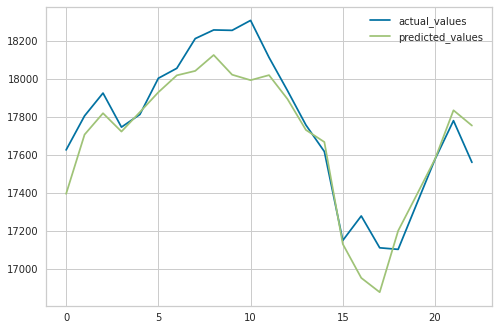

In [36]:
#Plot to see Actual vs Predicted values

df.plot()

In [37]:
r2_score(actual_values, predicted_values)

0.834523340444153

In [38]:
final_model = finalize_model(model_1)

In [39]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
pred_data_final = predict_model(final_model, data = test_data_1)

In [41]:
pred_data_final.head()

Open          High           Low  Volume  year  month  day  \
0  17387.150391  17646.650391  17383.300781  200500  2022      1    0   
1  17681.400391  17827.599609  17593.550781  247400  2022      1    1   
2  17820.099609  17944.699219  17748.849609  251500  2022      1    2   
3  17768.500000  17797.949219  17655.550781  236500  2022      1    3   
4  17797.599609  17905.000000  17704.550781  239300  2022      1    4   

          Label  
0  17546.787109  
1  17784.082031  
2  17828.099609  
3  17758.632812  
4  17817.226562

In [42]:
predicted_values_final = list(pred_data_final['Label'])

In [44]:
df_final = pd.DataFrame({'Date':list(test_data['Date']), 'actual_values':actual_values, 'predicted_values':predicted_values_final})
df_final.head()

Date  actual_values  predicted_values
0  2022-01-03   17625.699219      17546.787109
1  2022-01-04   17805.250000      17784.082031
2  2022-01-05   17925.250000      17828.099609
3  2022-01-06   17745.900391      17758.632812
4  2022-01-07   17812.699219      17817.226562

<AxesSubplot:>

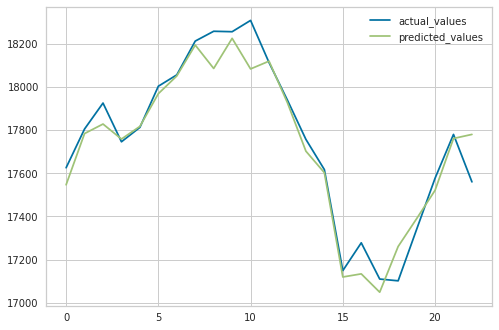

In [45]:
df_final.plot()

In [46]:
r2_score(actual_values, predicted_values_final)

0.9327962464634134

#### XGBoost model gave a val accuracy of 99.73% with train data and test accuracy of 93.27% with out of time test data.

#### By looking at the above plot we can clearly see our model captured the direction of the stock price exactly, but by what rate it changes is not captured with 100% accuracy.

#### To improve the accuracy on unseen data we can focus on feature engineering.

#### Also looking at the learning curve, we need more data to reduce the complexity of the model and increase generalization.